In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
print(df.duplicated().sum())

1390


In [5]:
new_df = df.drop_duplicates(ignore_index=False)

In [6]:
print(new_df.duplicated().sum())

0


In [7]:
new_df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [8]:
new_df = new_df.loc[(new_df['Investigation.Type'] == 'Accident') 
                   & (new_df['Country'] == 'United States')
                    & (new_df['Event.Date'] > '2001-11-01')
                    & (new_df['Aircraft.Category'] != 'Helicopter')
                    & (new_df['Aircraft.Category'] != 'Glider')
                    & (new_df['Aircraft.Category'] != 'Balloon')
                    & (new_df['Aircraft.Category'] != 'Gyrocraft')
                    & (new_df['Aircraft.Category'] != 'Weight-Shift')
                    & (new_df['Aircraft.Category'] != 'Powered Parachute')
                    & (new_df['Aircraft.Category'] != 'Ultralight')
                    & (new_df['Aircraft.Category'] != 'Uknown')
                    & (new_df['Aircraft.Category'] != 'WSFT')
                    & (new_df['Aircraft.Category'] != 'Powered-Lift')
                    & (new_df['Aircraft.Category'] != 'Blimp')
                    & (new_df['Aircraft.Category'] != 'UNK')
                    & (new_df['Aircraft.Category'] != 'ULTR')
                    & (new_df['Aircraft.Category'] != 'Rocket')
                    
                    & (new_df['Purpose.of.flight'] != 'Instructional')
                    & (new_df['Purpose.of.flight'] != 'Unknown')
                    & (new_df['Purpose.of.flight'] != 'Aerial Application')
                    & (new_df['Purpose.of.flight'] != 'Positioning')
                    & (new_df['Purpose.of.flight'] != 'Ferry')
                    & (new_df['Purpose.of.flight'] != 'Aerial Observation')
                    & (new_df['Purpose.of.flight'] != 'Flight Test')
                    & (new_df['Purpose.of.flight'] != 'Skydiving')
                    & (new_df['Purpose.of.flight'] != 'External Load')
                    & (new_df['Purpose.of.flight'] != 'Banner Tow')
                    & (new_df['Purpose.of.flight'] != 'Air Race show')
                    & (new_df['Purpose.of.flight'] != 'Air Race/show') 
                    & (new_df['Purpose.of.flight'] != 'Glider Tow')
                    & (new_df['Purpose.of.flight'] != 'Firefighting') 
                    & (new_df['Purpose.of.flight'] != 'Air Drop') 
                    & (new_df['Purpose.of.flight'] != 'ASHO') 
                    & (new_df['Purpose.of.flight'] != 'PUBS') 
                    & (new_df['Purpose.of.flight'] != 'PUBL')]

In [9]:
new_df = new_df.dropna(subset=['Make'])

In [10]:
new_df['Make'] = new_df['Make'].str.title()

In [11]:
new_df['Make'].value_counts()

Cessna          6041
Piper           3706
Beech           1461
Mooney           429
Boeing           377
                ... 
Cupaiole           1
Howes              1
Tucker-Hurni       1
Iv Inc.            1
Van Heeswyk        1
Name: Make, Length: 3772, dtype: int64

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21317 entries, 51711 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                21317 non-null  object 
 1   Investigation.Type      21317 non-null  object 
 2   Accident.Number         21317 non-null  object 
 3   Event.Date              21317 non-null  object 
 4   Location                21310 non-null  object 
 5   Country                 21317 non-null  object 
 6   Latitude                20848 non-null  object 
 7   Longitude               20840 non-null  object 
 8   Airport.Code            14897 non-null  object 
 9   Airport.Name            15009 non-null  object 
 10  Injury.Severity         21275 non-null  object 
 11  Aircraft.damage         20919 non-null  object 
 12  Aircraft.Category       15666 non-null  object 
 13  Registration.Number     21316 non-null  object 
 14  Make                    21317 non-

In [13]:
new_df['Total.Fatal.Injuries'] = new_df['Total.Fatal.Injuries'].fillna(value=0)
new_df['Total.Serious.Injuries'] = new_df['Total.Serious.Injuries'].fillna(value=0)
new_df['Total.Minor.Injuries'] = new_df['Total.Minor.Injuries'].fillna(value=0)

In [14]:
new_df['Total.Injuries'] = new_df['Total.Fatal.Injuries'] + new_df['Total.Serious.Injuries'] + new_df['Total.Minor.Injuries']

In [15]:
new_df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
51711,20011120X02265,Accident,SEA02LA010,2001-11-02,"ONTARIO, OR",United States,NaN,NaN,ONO,Ontario Muni,Non-Fatal,Substantial,NaN,N26WF,Fetherolf,Hatz CB-1,Yes,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,18-06-2002,0.0
51712,20011114X02238,Accident,NYC02LA024,2001-11-02,"ARGYLE, NY",United States,NaN,NaN,1C3,Argyle Airport,Non-Fatal,Substantial,NaN,N36SK,Cessna,172D,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,04-06-2002,0.0
51713,20011106X02198,Accident,CHI02LA018,2001-11-02,"PEORIA, IL",United States,NaN,NaN,3MY,MOUNT HAWLEY AUXILIARY,Non-Fatal,Substantial,NaN,N5984V,Piper,PA-28R-201T,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,16-01-2003,0.0
51715,20011125X02293,Accident,NYC02LA031,2001-11-03,"NORTH LIMA, OH",United States,40.984444,-80.691111,OI76,Bieber's Seaplane Base,Non-Fatal,Substantial,NaN,N5511G,Maule,M7-260,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,04-06-2002,0.0
51716,20011228X02462,Accident,NYC02LA021,2001-11-03,"ROANOKE, VA",United States,37.352778,-79.93,ROA,Roanoke Regional,Non-Fatal,Substantial,NaN,N5207Z,Piper,PA-22-108,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Climb,Probable Cause,18-06-2002,0.0


In [16]:
sum(new_df['Model'].isna())

3

In [17]:
new_df = new_df.dropna(subset=['Model'])

In [18]:
##Karina complete this cell 
new_df = new_df.drop('Injury.Severity', axis =1)
new_df = new_df.drop('Registration.Number', axis =1)
new_df = new_df.drop('Amateur.Built', axis =1)
new_df = new_df.drop('FAR.Description', axis =1)
new_df = new_df.drop('Schedule', axis =1)
new_df = new_df.drop('Air.carrier', axis =1)
new_df = new_df.drop('Weather.Condition', axis =1)
new_df = new_df.drop('Report.Status', axis =1)
new_df = new_df.drop('Publication.Date', axis =1)

In [19]:
new_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight,Total.Injuries
51711,20011120X02265,Accident,SEA02LA010,2001-11-02,"ONTARIO, OR",United States,NaN,NaN,ONO,Ontario Muni,Substantial,NaN,Fetherolf,Hatz CB-1,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Landing,0.0
51712,20011114X02238,Accident,NYC02LA024,2001-11-02,"ARGYLE, NY",United States,NaN,NaN,1C3,Argyle Airport,Substantial,NaN,Cessna,172D,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Maneuvering,0.0
51713,20011106X02198,Accident,CHI02LA018,2001-11-02,"PEORIA, IL",United States,NaN,NaN,3MY,MOUNT HAWLEY AUXILIARY,Substantial,NaN,Piper,PA-28R-201T,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Landing,0.0
51715,20011125X02293,Accident,NYC02LA031,2001-11-03,"NORTH LIMA, OH",United States,40.984444,-80.691111,OI76,Bieber's Seaplane Base,Substantial,NaN,Maule,M7-260,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,Landing,0.0
51716,20011228X02462,Accident,NYC02LA021,2001-11-03,"ROANOKE, VA",United States,37.352778,-79.93,ROA,Roanoke Regional,Substantial,NaN,Piper,PA-22-108,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,Climb,0.0


In [20]:
new_df['Purpose.of.flight'].value_counts()

Personal                     18405
Business                       719
Other Work Use                 304
Public Aircraft                141
Executive/corporate            122
Public Aircraft - Federal       68
Public Aircraft - State         32
Public Aircraft - Local         19
Name: Purpose.of.flight, dtype: int64

In [21]:
new_df['Number.of.Engines'].value_counts().sort_index()

0.0       74
1.0    18146
2.0     2460
3.0       31
4.0       32
Name: Number.of.Engines, dtype: int64

''

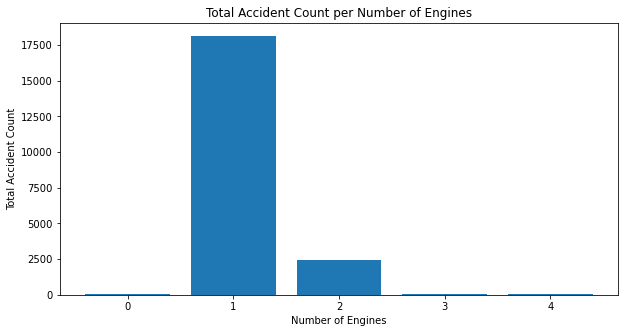

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

x = new_df['Number.of.Engines'].value_counts().index
y = new_df['Number.of.Engines'].value_counts().values

ax.bar(x,y)
ax.set_title('Total Accident Count per Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Total Accident Count')
;

## avoid airplanes with one engine since airplanes with at least two engines can run on the other engine as a backup. The graph shows that airplanes with a singular engine have the most amount of accidents.


In [23]:
## Ermiyas: make a visual type of engine vs # of accidents

''

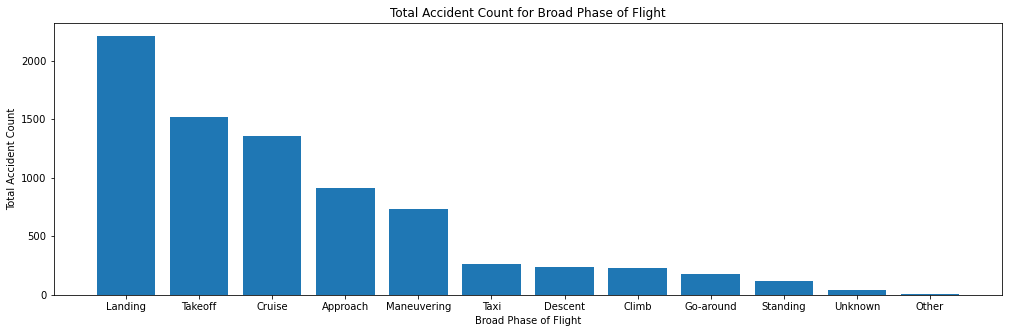

In [24]:
## Sangwon: make a visual for broad phase of flights vs # of accidents
fig, ax = plt.subplots(figsize=(17,5))

x = new_df['Broad.phase.of.flight'].value_counts().index
y = new_df['Broad.phase.of.flight'].value_counts().values

ax.bar(x,y)
ax.set_title('Total Accident Count for Broad Phase of Flight')
ax.set_xlabel('Broad Phase of Flight')
ax.set_ylabel('Total Accident Count')
;

In [25]:
## Ermiyas: use groupby for make/model and # of accidents using 'Total.Injuries' and value sort

In [26]:
## Sangwon: use groupby for make/model based on aircraft damage category